# 국토 교통부 자동차 등록 현황 
## 1. Data 수집
- 국토교통 통계누리 사이트에서 자동차 등록 현황 보고를 csv 파일로 다운로드 받음.
- 기간 : 2011년 01월 ~ 2024년 10월
- 파일명 : car.xlsx (car.csv 파일은 숫자의 3자리 마다 ',' 기호가 찍혀 있어서 load시 에러남.
## 2. Data Loading

In [1]:
# pip install openpyxl

In [2]:
def loadData(_file = './car.xlsx'):
    import pandas as pd
    _df = pd.read_excel(_file, engine='openpyxl')
    return _df        

In [3]:
df = loadData()

/home/encore/miniconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## 3. Data 형상 분석

In [4]:
# Data의 개수 확인
df.shape

(44602, 23)

In [5]:
# Data의 컬럼명 확인
df.columns

Index(['자동차등록현황보고(Total Registered Motor Vehicles) / 자동차등록대수현황 시도별 (201101 ~ 202410)',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [6]:
# 컬럼명이 특이하여 Data 의 형상 확인
df.head(7)

,자동차등록현황보고(Total Registered Motor Vehicles) / 자동차등록대수현황 시도별 (201101 ~ 202410),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,다운로드 시간 : 2024-11-13 11:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,검색기간 : 201101 ~ 202410,검색분야 : 종합일반,작성주기 : 매월,단위 : 대,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,월(Monthly),시도명,시군구,승용,승용,승용,승용,승합,승합,승합,...,화물,화물,특수,특수,특수,특수,총계,총계,총계,총계
4,월(Monthly),시도명,시군구,관용,자가용,영업용,계,관용,자가용,영업용,...,영업용,계,관용,자가용,영업용,계,관용,자가용,영업용,계
5,2011-01,서울,계,"3,969","2,292,616","146,971","2,443,556","2,493","157,299","17,198",...,"52,648","366,723",314,"1,062","2,528","3,904","10,487","2,761,341","219,345","2,991,173"
6,2011-01,서울,강남구,163,"192,610","31,456","224,229",86,"8,261","1,728",...,"1,630","19,198",21,94,134,249,431,"218,372","34,948","253,751"


In [7]:
# 데이터 타입 확인
df.dtypes

자동차등록현황보고(Total Registered Motor Vehicles) / 자동차등록대수현황 시도별 (201101 ~ 202410)    object
Unnamed: 1                                                                      object
Unnamed: 2                                                                      object
Unnamed: 3                                                                      object
Unnamed: 4                                                                      object
Unnamed: 5                                                                      object
Unnamed: 6                                                                      object
Unnamed: 7                                                                      object
Unnamed: 8                                                                      object
Unnamed: 9                                                                      object
Unnamed: 10                                                                     object
Unnamed: 11                                

In [8]:
# Null Data 확인
df.loc[5:,].isnull().sum()

자동차등록현황보고(Total Registered Motor Vehicles) / 자동차등록대수현황 시도별 (201101 ~ 202410)      0
Unnamed: 1                                                                        0
Unnamed: 2                                                                        0
Unnamed: 3                                                                       10
Unnamed: 4                                                                        7
Unnamed: 5                                                                        8
Unnamed: 6                                                                        7
Unnamed: 7                                                                       35
Unnamed: 8                                                                        7
Unnamed: 9                                                                       38
Unnamed: 10                                                                       7
Unnamed: 11                                                                 

In [9]:
# Null 이 많은 컬럼이 무슨 데이터를 의미 하는지 확인
df.loc[3:,'Unnamed: 15']

3         특수
4         관용
5        314
6         21
7         10
        ... 
44597     13
44598     28
44599      8
44600     15
44601    209
Name: Unnamed: 15, Length: 44599, dtype: object

In [10]:
type(df.iloc[5,22])

str

### 3.2. 형상 확인 결과
- 데이터 값은 5행부터 시작함
- 컬럼명은 데이터의 제목명으로 추정 컬럼명 변경 필요
- 0행은 원본 엑셀파일의 다운로드 시간으로 추정 삭제 필요
- 1행은 데이터의 검색 조건으로 추정 삭제 필요
- 2행은 공백 행으로 추정 삭제 필요
- 3행과 4행은 실제적인 컬럼명으로 추정, 컬럼명을 추출 후 삭제 필요
- 숫자 데이터는 문자열로 추정, 자릿수 제거 필요

## 4. Data 전처리
### 4.1. 컬럼 명 변경

In [11]:
df.columns = ["month","sido","gungu","passengerA","passengerB","passengerC","passengerT","vanA","vanB","vanC","vanT","cargoA","cargoB","cargoC","cargoT","specialA","specialB","specialC","specialT","totalA","totalB","totalC","totalT"]

### 4.2. 이상 행 삭제

In [12]:
df = df.iloc[5:,]

### 4.3. 숫자문자를 숫자로 변경

In [13]:
df.iloc[0:,3:].replace(to_replace=',', value='',regex=True, inplace=True)

/tmp/ipykernel_2456/3313810265.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.iloc[0:,3:].replace(to_replace=',', value='',regex=True, inplace=True)


In [14]:
import numpy as np
df.iloc[0:,3:] = df.iloc[0:,3:].fillna(-1).astype('int').replace({-1:np.nan}) 

In [15]:
type(df.iloc[0,3])

float

### 4.4. 월을 Date 형식으로 변경

In [16]:
df.iloc[0:,0] = df.iloc[0:,0] + '-01'

In [17]:
df.head(5)

,month,sido,gungu,passengerA,passengerB,passengerC,passengerT,vanA,vanB,vanC,...,cargoC,cargoT,specialA,specialB,specialC,specialT,totalA,totalB,totalC,totalT
5,2011-01-01,서울,계,3969.0,2292616.0,146971.0,2443556.0,2493.0,157299.0,17198.0,...,52648.0,366723.0,314.0,1062.0,2528.0,3904.0,10487.0,2761341.0,219345.0,2991173.0
6,2011-01-01,서울,강남구,163.0,192610.0,31456.0,224229.0,86.0,8261.0,1728.0,...,1630.0,19198.0,21.0,94.0,134.0,249.0,431.0,218372.0,34948.0,253751.0
7,2011-01-01,서울,강동구,81.0,107074.0,6261.0,113416.0,50.0,8159.0,703.0,...,2096.0,17662.0,10.0,34.0,157.0,201.0,256.0,130718.0,9217.0,140191.0
8,2011-01-01,서울,강북구,103.0,55201.0,2585.0,57889.0,47.0,5189.0,727.0,...,1434.0,10215.0,10.0,15.0,17.0,42.0,302.0,69044.0,4763.0,74109.0
9,2011-01-01,서울,강서구,111.0,132643.0,15523.0,148277.0,58.0,9761.0,1254.0,...,2672.0,21757.0,13.0,80.0,88.0,181.0,349.0,161402.0,19537.0,181288.0


### 4.5. Index 변경

In [77]:
df.set_index('month', inplace=True)

In [78]:
df.head(5)

,sido,gungu,passengerA,passengerB,passengerC,passengerT,vanA,vanB,vanC,vanT,...,cargoC,cargoT,specialA,specialB,specialC,specialT,totalA,totalB,totalC,totalT
month,,,,,,,,,,,,,,,,,,,,,
2011-01-01,서울,계,3969.0,2292616.0,146971.0,2443556.0,2493.0,157299.0,17198.0,176990.0,...,52648.0,366723.0,314.0,1062.0,2528.0,3904.0,10487.0,2761341.0,219345.0,2991173.0
2011-01-01,서울,강남구,163.0,192610.0,31456.0,224229.0,86.0,8261.0,1728.0,10075.0,...,1630.0,19198.0,21.0,94.0,134.0,249.0,431.0,218372.0,34948.0,253751.0
2011-01-01,서울,강동구,81.0,107074.0,6261.0,113416.0,50.0,8159.0,703.0,8912.0,...,2096.0,17662.0,10.0,34.0,157.0,201.0,256.0,130718.0,9217.0,140191.0
2011-01-01,서울,강북구,103.0,55201.0,2585.0,57889.0,47.0,5189.0,727.0,5963.0,...,1434.0,10215.0,10.0,15.0,17.0,42.0,302.0,69044.0,4763.0,74109.0
2011-01-01,서울,강서구,111.0,132643.0,15523.0,148277.0,58.0,9761.0,1254.0,11073.0,...,2672.0,21757.0,13.0,80.0,88.0,181.0,349.0,161402.0,19537.0,181288.0


# 5. DB 생성

## 5.1. Connection 객체 만들기

In [18]:
def getEngine():
    import sqlalchemy
    from urllib import parse
    user = 'team3'
    password = 'Encore_team3@'
    host='192.168.0.95'
    port = 3306
    database = 'team3'
    password = parse.quote_plus(password)
    engine = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")
    
    try:
        with engine.connect() as connection:
            print("Database connection successful!")
    except Exception as e:
        print(f"Database connection failed: {e}")

    return engine

In [19]:
_engine = getEngine()

Database connection successful!


### 5.2. Table 생성

In [20]:
def createTable(engine):
    from sqlalchemy.ext.declarative import declarative_base
    from sqlalchemy import Column, Integer, String, DECIMAL, Float, Date, Table, Double

    Base = declarative_base()
    
    class Car(Base):
        __tablename__  = 'tb_car'
        seq     = Column(Integer, autoincrement=True, primary_key=True)
        month   = Column(Date)             # 월(Monthly)
        sido    = Column(String(10))       # 시도명
        gugun   = Column(String(10))       # 시군구
        passengerA      = Column(Double)  # 승용-관용
        passengerB      = Column(Double)  # 승용-자가용
        passengerC      = Column(Double)  # 승용-영업용
        passengerT      = Column(Double)  # 승용-계
        vanA            = Column(Double)  # 승합-관용
        vanB            = Column(Double)  # 승합-자가용
        vanC            = Column(Double)  # 승합-영업용
        vanT            = Column(Double)  # 승합-계
        cargoA          = Column(Double)  # 화물-관용
        cargoB          = Column(Double)  # 화물-자가용
        cargoC          = Column(Double)  # 화물-영업용
        cargoT          = Column(Double)  # 화물-계
        specialA        = Column(Double)  # 특수-관용
        specialB        = Column(Double)  # 특수-자가용
        specialC        = Column(Double)  # 특수-영업용
        specialT        = Column(Double)  # 특수-계
        totalA          = Column(Double)  # 총계-관용
        totalB          = Column(Double)  # 총계-자가용
        totalC          = Column(Double)  # 총계-영업용
        totalT          = Column(Double)  # 총계-계

    base = Base()
    base.metadata.drop_all(engine)
    base.metadata.create_all(engine)

In [21]:
# createTable(_engine)

/tmp/ipykernel_2456/1746101534.py:5: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [22]:
df.columns

Index(['month', 'sido', 'gungu', 'passengerA', 'passengerB', 'passengerC',
       'passengerT', 'vanA', 'vanB', 'vanC', 'vanT', 'cargoA', 'cargoB',
       'cargoC', 'cargoT', 'specialA', 'specialB', 'specialC', 'specialT',
       'totalA', 'totalB', 'totalC', 'totalT'],
      dtype='object')

### 5.3. Data Import to DB

In [23]:
df.to_sql('tb_car', if_exists='append', index=False, con=_engine)
# cu_df.to_sql('tb_cu',if_exists='append', index=False, con=engine)

44597

## 6. Data 분석

### 6.1.서울 지역의 등록 차량 증가 추이

In [165]:
def drawData(_df):
    # _df.loc[0:20,'passengerT'].plot(kind='line')
    _df.loc[(_df['sido']=='서울') & (_df['gungu']=='계'),['passengerT','vanT','cargoT', 'specialT']].plot.line(figsize=(10,5))

In [166]:
# df.loc[(df['sido']=='서울') & (df['gungu']=='계'),['passengerT','vanT','cargoT', 'specialT']]

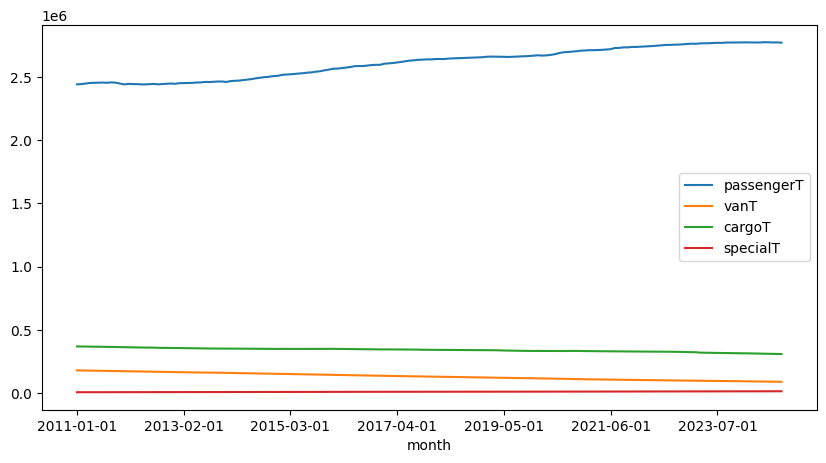

In [167]:
drawData(df)

### 6.2. 서울 지역 구별 등록 차량 변화 추이

In [179]:
def drawDataGu(_df):
    _df.loc[(_df['sido']=='서울') & (_df['gungu']!='계'),['gungu','passengerT','vanT','cargoT', 'specialT']].plot.bar(figsize=(15,5), )

In [ ]:
df.loc[(df['sido']=='서울') & (df['gungu']!='계'),['gungu','passengerT','vanT','cargoT', 'specialT']].loc['2023-12-01'].plot.line(figsize=(15,5),x='gungu')

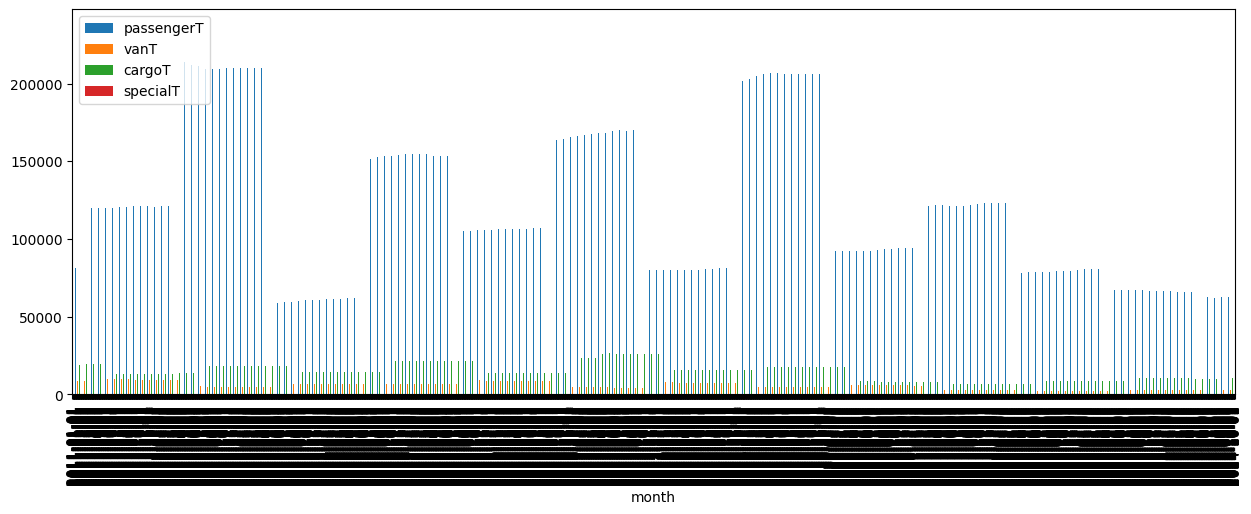

In [181]:
drawDataGu(df)

In [188]:
import pandas
help(pandas.DataFrame().plot.line)

Help on method line in module pandas.plotting._core:

line(x: 'Hashable | None' = None, y: 'Hashable | None' = None, **kwargs) -> 'PlotAccessor' method of pandas.plotting._core.PlotAccessor instance
    Plot Series or DataFrame as lines.
    
    This function is useful to plot lines using DataFrame's values
    as coordinates.
    
    Parameters
    ----------
    x : label or position, optional
        Allows plotting of one column versus another. If not specified,
        the index of the DataFrame is used.
    y : label or position, optional
        Allows plotting of one column versus another. If not specified,
        all numerical columns are used.
    color : str, array-like, or dict, optional
        The color for each of the DataFrame's columns. Possible values are:
    
        - A single color string referred to by name, RGB or RGBA code,
            for instance 'red' or '#a98d19'.
    
        - A sequence of color strings referred to by name, RGB or RGBA
            cod

In [198]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list.count('nanum*')

0